@Dodiya Parth

In [4]:
import torch as T
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import os

from sklearn import preprocessing
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import ToTensor

In [5]:
os.getcwd()

'D:\\Hand_Gesture_Recognition'

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'binary_frames',
 'grayscale_frames',
 'IE Hand Gesture Recognition.ipynb',
 'mnist',
 'Original videos',
 'original_frames',
 'rotated _scaled _grayscale_frames']

In [7]:
os.listdir(os.getcwd()+"\\"+"grayscale_frames")

['a_1-19.png',
 'a_1-38.png',
 'a_1-57.png',
 'a_1-76.png',
 'a_1-95.png',
 'a_2-19.png',
 'a_2-38.png',
 'a_2-57.png',
 'a_2-76.png',
 'a_2-95.png',
 'a_3-19.png',
 'a_3-38.png',
 'a_3-57.png',
 'a_3-76.png',
 'a_3-95.png',
 'a_4-19.png',
 'a_4-38.png',
 'a_4-57.png',
 'a_4-76.png',
 'a_4-95.png',
 'a_5-19.png',
 'a_5-38.png',
 'a_5-57.png',
 'a_5-76.png',
 'a_5-95.png',
 'a_6-19.png',
 'a_6-38.png',
 'a_6-57.png',
 'a_6-76.png',
 'a_6-95.png',
 'a_7-19.png',
 'a_7-38.png',
 'a_7-57.png',
 'a_7-76.png',
 'a_7-95.png',
 'a_8-19.png',
 'a_8-38.png',
 'a_8-57.png',
 'a_8-76.png',
 'a_8-95.png',
 'b_1-19.png',
 'b_1-38.png',
 'b_1-57.png',
 'b_1-76.png',
 'b_1-95.png',
 'b_2-19.png',
 'b_2-38.png',
 'b_2-57.png',
 'b_2-76.png',
 'b_2-95.png',
 'b_3-19.png',
 'b_3-38.png',
 'b_3-57.png',
 'b_3-76.png',
 'b_3-95.png',
 'b_4-19.png',
 'b_4-38.png',
 'b_4-57.png',
 'b_4-76.png',
 'b_4-95.png',
 'b_5-19.png',
 'b_5-38.png',
 'b_5-57.png',
 'b_5-76.png',
 'b_5-95.png',
 'b_6-19.png',
 'b_6-38.p

In [8]:
img=[]
label=[]
u=os.getcwd()+"\\"+"grayscale_frames\\"
for i in os.listdir(os.getcwd()+"\\"+"grayscale_frames"):
    img.append(u+i)
    label.append(i[0])

In [9]:
le = preprocessing.LabelEncoder()
le.fit(label)
print(list(le.classes_))
label_int=le.transform(label)
print(label_int[:30])
print(le.inverse_transform([0,20,11]))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['a' 'v' 'm']


### pyTorch handles one-hot-encoding itself, thus the below cell is not usefull

In [10]:
ohe=preprocessing.OneHotEncoder(sparse=False)
onehot_encoded = ohe.fit_transform(label_int.reshape(len(label_int), 1))
print(onehot_encoded)
# invert first example
inverted = le.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)
print(np.shape(onehot_encoded))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['a']
(960, 24)


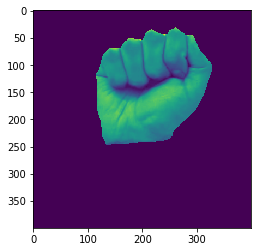

In [11]:
img_mat=[]
for i in img:
    img_mat.append(plt.imread(i))
plt.imshow(img_mat[0])

In [12]:
X=np.array(img_mat)
y=onehot_encoded
data=[]
for i in range(len(label_int)):
    data.append((np.array([X[i]]),label_int[i]))


CNN architecture

In [13]:
class CNN(nn.Module):
    def __init__(self,data,lr,epochs,batch_size,num_classes=24):
        super(CNN,self).__init__()
        self.epochs=epochs
        self.lr=lr
        self.data=data
        self.batch_size=batch_size
        self.num_classes=num_classes
        self.loss_history=[]
        self.acc_history=[]
        self.device=T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.conv1=nn.Conv2d(1,32,3)
        self.bn1=nn.BatchNorm2d(32)
#         self.conv2=nn.conv2d(32,32,3)
#         seld.bn2=nn.BatchNorm2d(32)
#         self.conv3=nn.Conv2d(32,32,3)
#         self.BatchNorm2d(32)
        self.maxpool1=nn.MaxPool2d(4)
        self.conv4=nn.Conv2d(32,64,3)
        self.bn4=nn.BatchNorm2d(64)
#         self.conv5=nn.BatchNorm2d(64)
#         self.conv6=nn.nn.Conv2d(64,64,4)
#         self.bn6=nn.BatchNorm2d(64)
        self.maxpool2=nn.MaxPool2d(2)
        
        input_dims=self.calc_input_dims()
        
        self.fc1=nn.Linear(input_dims,self.num_classes)
        
        self.optimizer=optim.Adam(self.parameters(),lr=self.lr)
        
        self.loss=nn.CrossEntropyLoss()
        self.to(self.device)
        self.get_data()
        
        
    def calc_input_dims(self):
        batch_data=T.zeros(1,1,400,400)
        batch_data=self.conv1(batch_data)
        batch_data=self.maxpool1(batch_data)
        batch_data=self.conv4(batch_data)
        batch_data=self.maxpool2(batch_data)
        return np.prod(batch_data.size())
    
    def forward(self,batch_data):
        batch_data=T.tensor(batch_data).to(self.device)
        batch_data=self.conv1(batch_data)
        batch_data=self.bn1(batch_data)
        batch_data=F.relu(batch_data)
        batch_data=self.maxpool1(batch_data)
        batch_data=self.conv4(batch_data)
        batch_data=self.bn4(batch_data)
        batch_data=F.relu(batch_data)
        batch_data=self.maxpool2(batch_data)
        batch_data=batch_data.view(batch_data.size()[0],-1)
        
        classes=self.fc1(batch_data)
        return classes
    
    def get_data(self):
        self.train_data_loader=T.utils.data.DataLoader(data[:644],batch_size=self.batch_size,
                                                      shuffle=True,)
        self.test_data_loader=T.utils.data.DataLoader(data[644:],
                                                     batch_size=self.batch_size,
                                                     shuffle=True,)
        
    
    def _train(self):
        self.train()
        for i in range(self.epochs):
            ep_loss=0
            ep_acc=[]
            for j,(input,label) in enumerate(self.train_data_loader):
                self.optimizer.zero_grad()
                label=label.to(self.device,T.int64)
                prediction=self.forward(input)
                loss=self.loss(prediction,label)
                prediction=F.softmax(prediction,dim=1)
                classes=T.argmax(prediction,dim=1)
                wrong=T.where(classes!=label,T.tensor([1.]).to(self.device),
                             T.tensor([0.]).to(self.device))
                acc=1-T.sum(wrong)/self.batch_size
                
                ep_acc.append(acc.item())
                self.acc_history.append(acc.item())
                ep_loss+=loss.item()
                loss.backward()
                self.optimizer.step()
            print("finish epoch",i,'total loss %.3f' % ep_loss,
                 'accuracy %.3f'%np.mean(ep_acc))
            self.loss_history.append(ep_loss)
                
    def _test(self):
        #self.test()
        ep_loss=0
        ep_acc=[]
        for j,(input,label) in enumerate(self.train_data_loader):
            self.optimizer.zero_grad()
            label=label.to(self.device,T.int64)
            prediction=self.forward(input)
            loss=self.loss(prediction,label.squeeze())
            prediction=F.softmax(prediction,dim=1)
            classes=T.argmax(prediction,dim=1)
            wrong=T.where(classes!=label,T.tensor([1.]).to(self.device),
                         T.tensor([0.]).to(self.device))
            acc=1-T.sum(wrong)/self.batch_size
            
            ep_acc.append(acc.item())
            self.acc_history.append(acc.item())
            ep_loss+=loss.item()
        print('total loss %.3f' % ep_loss,
             'accuracy %.3f'%np.mean(ep_acc))
                


Training

C:\Users\Parth\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


finish epoch 0 total loss 1129.966 accuracy 0.311
finish epoch 1 total loss 169.990 accuracy 0.757
finish epoch 2 total loss 84.421 accuracy 0.885


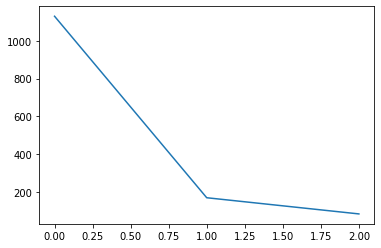

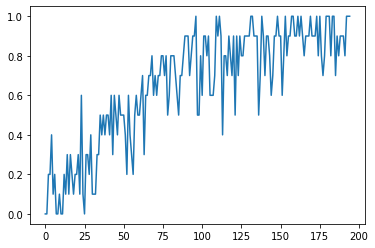

total loss 32.055 accuracy 0.946


In [14]:
if __name__=="__main__":
    network=CNN(data=data,lr=0.001,batch_size=10,epochs=3)
    network._train()
    plt.plot(network.loss_history)
    plt.show()
    plt.plot(network.acc_history)
    plt.show()
    network._test()

### Rough Work 
The below cells are not useful

In [15]:
from torchvision.datasets import MNIST


In [16]:
mnist_trein_data=MNIST('mnist',train=True,download=True,transform=ToTensor())


In [17]:
train_data_loader=T.utils.data.DataLoader(mnist_trein_data,batch_size=32,shuffle=True,num_workers=8)

In [18]:
y=0
s=1
for j,(x,y) in enumerate(mnist_trein_data):
    if j==5:
        print(y)

2


In [20]:
T.save(network,"D://Hand_Gesture_Recognition//model.h5")

C:\Users\Parth\Anaconda3\envs\PythonGPU\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [21]:
model_test=T.load("D://Hand_Gesture_Recognition//model.h5")

In [25]:
model_test([[X[100]]])

tensor([[ -6.3618,  15.7953,  41.0206,   6.0164,  10.8188,  -0.3514, -30.8275,
          -1.6622,  -8.3083,  -7.7371,   0.1616,   3.0060,   2.6630,   1.2386,
          17.0803,   5.4350,  11.5979, -94.7203, -94.9615, -95.0060, -94.5707,
         -94.2107, -94.7739, -94.9541]], device='cuda:0',
       grad_fn=<AddmmBackward>)